In [ ]:
import pandas as pd


In [ ]:
bg = pd.read_csv('/content/bg_filtered_HG00101.haplotypeCalls.er.raw.bed', sep="\t", header=None)
se_e = pd.read_csv('/content/se_e_filtered_HG00101.haplotypeCalls.er.raw.bed', sep="\t", header=None)
te = pd.read_csv('/content/te_e_filtered_HG00101.haplotypeCalls.er.raw.bed', sep="\t", header=None)

In [ ]:
bg[31]=bg[2]-bg[1]
se_e[31]=se_e[2]-se_e[1]
te[31]=te[2]-te[1]

bg[32]=bg[30]/bg[31]
se_e[32]=se_e[30]/se_e[31]
te[32]=te[30]/te[31]


In [ ]:
bg

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,chr13,57232166,57232434,.,.,.,.,.,.,.,...,.,.,.,.,.,.,bg,0,268,0.000000
1,chr3,59166568,59166836,.,.,.,.,.,.,.,...,.,.,.,.,.,.,bg,0,268,0.000000
2,chr2,140189338,140189606,.,.,.,.,.,.,.,...,.,.,.,.,.,.,bg,1,268,0.003731
3,chr8,13605507,13605775,.,.,.,.,.,.,.,...,.,.,.,.,.,.,bg,0,268,0.000000
4,chr10,2025662,2025930,.,.,.,.,.,.,.,...,.,.,.,.,.,.,bg,1,268,0.003731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101629,chr6,94266522,94266790,.,.,.,.,.,.,.,...,.,.,.,.,.,.,bg,0,268,0.000000
101630,chr7,79548438,79548706,.,.,.,.,.,.,.,...,.,.,.,.,.,.,bg,0,268,0.000000
101631,chrX,2091088,2091356,.,.,.,.,.,.,.,...,.,.,.,.,.,.,bg,0,268,0.000000
101632,chrY,47813687,47813955,.,.,.,.,.,.,.,...,.,.,.,.,.,.,bg,0,268,0.000000


(array([8.3796e+04, 1.1257e+04, 3.5170e+03, 1.6080e+03, 6.0800e+02,
        3.4400e+02, 1.7700e+02, 9.6000e+01, 8.8000e+01, 3.7000e+01,
        1.9000e+01, 2.0000e+01, 1.3000e+01, 1.0000e+01, 1.1000e+01,
        5.0000e+00, 7.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([0.        , 0.00388007, 0.00776014, 0.01164021, 0.01552028,
        0.01940035, 0.02328042, 0.02716049, 0.03104056, 0.03492063,
        0.03880071, 0.04268078, 0.04656085, 0.05044092, 0.05432099,
        0.05820106, 0.06208113, 0.0659612 , 0.06984127, 0.07372134,
        0.07760141, 0.08148148, 0.08536155, 0.08924162, 0.09312169,
        0.09700176, 0.10088183, 0.1047619 , 0.10864198, 0.11252205,
        0.11640212]),
 <BarContainer object of 30 artists>)

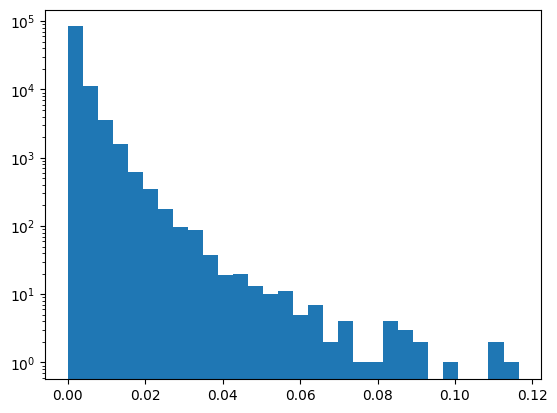

In [ ]:
plt.hist(te[32], bins=30 , log=True)


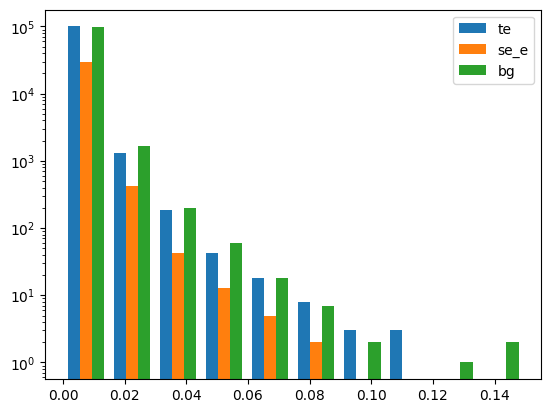

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist((te[32], se_e[32], bg[32]), log=True, label=["te", "se_e", "bg"])

plt.savefig('3hist.png')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

u1,p_se_t = mannwhitneyu(x=te[32],y=se_e[32])

In [ ]:
from scipy.stats import mannwhitneyu

u2, p_bg_se = mannwhitneyu(x=bg[32],y=se_e[32])

In [ ]:
from scipy.stats import mannwhitneyu

u3, p_bg_te = mannwhitneyu(x=bg[32],y=te[32])

In [ ]:
p=[p_se_t, p_bg_se, p_bg_te]
p

[9.278838578023186e-09, 6.18892405168482e-31, 3.916788648599175e-18]

In [ ]:
from statsmodels.sandbox.stats.multicomp import multipletests

rejected, p_adjusted, _, alpha_corrected = multipletests(p, method='bonferroni')
p_adjusted

array([2.78365157e-08, 1.85667722e-30, 1.17503659e-17])

In [ ]:
from scipy.stats import ks_2samp

ks_2samp(te[32],se_e[32])

KstestResult(statistic=0.019039643403606643, pvalue=9.34286081202785e-08, statistic_location=0.0, statistic_sign=1)